In [1]:
""" Imports """
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks, peak_prominences, peak_widths
import sys

In [ ]:
""" 
Pass Data in an argument when the file is run
    - This does not work in jupyter 
    - A test file shows this function
"""
ltoutputch1 = str(sys.argv[1]) # sys.argv[0] is the python file
ltoutputch4 = str(sys.argv[2])

ch1data = pd.read_csv(ltoutputch1, sep="\t")
ch4data = pd.read_csv(ltoutputch4, sep="\t")

ch1data.columns =["Time", "V(compout)-CH1"]
ch4data.columns =["Time", "V(compout)-CH4"]

In [2]:
""" Pull Data Manually """
ch1data = pd.read_csv("LtoutputFiles/output5ch1_05_03_2023.txt", sep="\t")
ch4data = pd.read_csv("LtoutputFiles/output5ch4_05_03_2023.txt", sep="\t")

ch1data.columns =["Time", "V(compout)-CH1"]
ch4data.columns =["Time", "V(compout)-CH4"]

In [3]:
""" Formatting """

# Create data frame 
ch1 = pd.DataFrame(ch1data)
ch4 = pd.DataFrame(ch4data)

# Check for shorter file and truncate 

# print(f"len ch1: {len(ch1)}\nlen ch4: {len(ch4)}")
if len(ch1) < len(ch4): 
    ch1 = ch1.truncate(after=len(ch1)-1) # smallest less 1 bc `after` adds a value
    ch4 = ch4.truncate(after=len(ch1)-1)
else: 
    ch1 = ch1.truncate(after=len(ch4)-1)
    ch4 = ch4.truncate(after=len(ch4)-1)
# print(f"\nTruncation:\nlen ch1: {len(ch1)}\nlen ch4: {len(ch4)}")

# Naming and floats
ch1t = ch1["Time"].to_numpy()
ch4t = ch4["Time"].to_numpy()
ch1V = ch1["V(compout)-CH1"].to_numpy()
ch4V = ch4["V(compout)-CH4"].to_numpy()

Peak indices
ch1: [  76  391  749 1078 1412]
ch4: [ 148  481  802 1126 1434]


Text(0, 0.5, 'Voltage (V)')

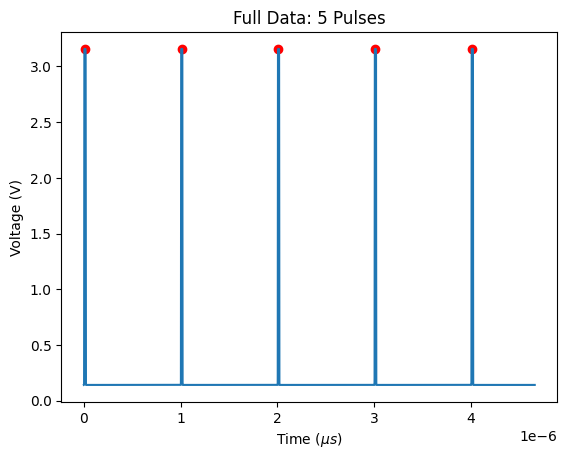

In [25]:
""" 
Find Rising edge (Full dataset): Testing block
    - Threshold voltage: 1.6V 
"""

# View all peaks 
peakindexCH1, _ = find_peaks(ch1V, height =1.6)
peakindexCH4, _ = find_peaks(ch4V, height= 1.6)
peaksCH1 = ch1V[peakindexCH1]
peaksCH4 = ch4V[peakindexCH4]

print(f'Peak indices\nch1: {peakindexCH1}\nch4: {peakindexCH4}')

plt.figure(0)
plt.plot(ch1t,ch1V) # nano
plt.scatter(ch1t[peakindexCH1],peaksCH1,  marker='o', color='red')
plt.title("Full Data: 5 Pulses")
plt.xlabel("Time ($\mu s$)")
plt.ylabel("Voltage (V)")

Text(0, 0.5, 'Voltage (V)')

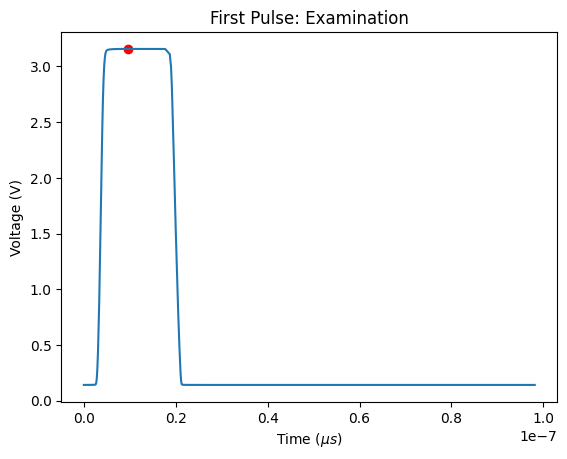

In [29]:
""" 
Find Rising edge (One Peak): Testing block
    - Threshold voltage: 1.6V 
"""

# View one peak
ch1peak = ch1.truncate(after=peakindexCH1[0]+100) # smallest less 1 bc `after` adds a value
ch4peak = ch4.truncate(after=peakindexCH4[0]+100)

# Naming and floats
ch1tpeak = ch1peak["Time"].to_numpy()
ch4tpeak = ch4peak["Time"].to_numpy()
ch1Vpeak = ch1peak["V(compout)-CH1"].to_numpy()
ch4Vpeak = ch4peak["V(compout)-CH4"].to_numpy()

plt.figure(1)
plt.plot(ch1tpeak,ch1Vpeak)
plt.scatter(ch1t[peakindexCH1[0]],peaksCH1[0],  marker='o', color='red')
plt.title("First Pulse: Examination")
plt.xlabel("Time ($\mu s$)")
plt.ylabel("Voltage (V)")


In [ ]:
# peakindexCH1, properties = find_peaks(ch1V, prominence=2, width =1)
# peaksCH1 = ch1V[peakindexCH1]


# properties["prominences"], properties["widths"]

# plt.plot(ch1V)

# plt.plot(peakindexCH1, peaksCH1, "v")

# plt.vlines(x=peakindexCH1, ymin=peaksCH1 - properties["prominences"],

#            ymax =peaksCH1, color = "C1")

# plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"],

#            xmax=properties["right_ips"], color = "C1")

# of pulses: 1
List: [1.657259]
# of pulses: 1
List: [3.694726814220805e-09]


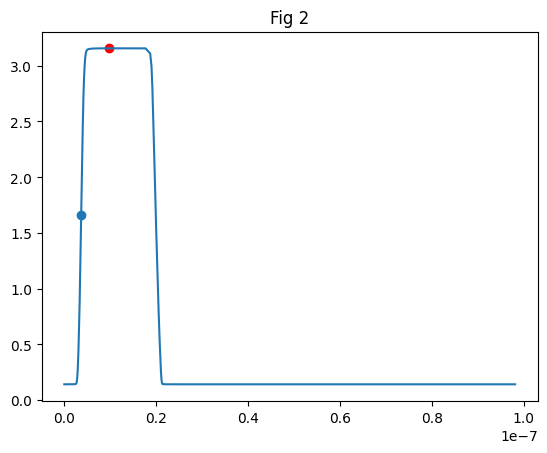

In [6]:
""" Slope checker: One Pulse """

# record 
trise = []
vrise = []
count = 0
eps = 0.45
Vmid = 1.5
pulses = 5

slope = np.diff(ch1Vpeak)/np.diff(ch1tpeak)

for (m,t,v) in zip(slope,ch1tpeak,ch1Vpeak): 
    if (m > 0 ) and (Vmid - eps) <= v <= (Vmid + eps):
        if count <= pulses: 

            trise.append(t)
            vrise.append(v)
            count +=1
        else:
            count +=1
            print('Error, we are beyond the input pulse value.')
            print(f"Pulses: 5\nPulses found: {count}") 


print(f"# of pulses: {len(vrise)}\nList: {vrise}")
print(f"# of pulses: {len(trise)}\nList: {trise}")

plt.figure(1)
plt.title("Fig 2")
plt.plot(ch1tpeak,ch1Vpeak)
plt.scatter(ch1t[peakindexCH1[0]],peaksCH1[0],  marker='o', color='red')
plt.scatter(trise, vrise)


# of pulses: 5
List: [1.657259, 1.035502, 1.114004, 1.589885, 1.334314]
# of pulses: 5
List: [3.694726814220805e-09, 1.003293775201765e-06, 2.0033211519684e-06, 3.003553160182265e-06, 4.003468349697794e-06]


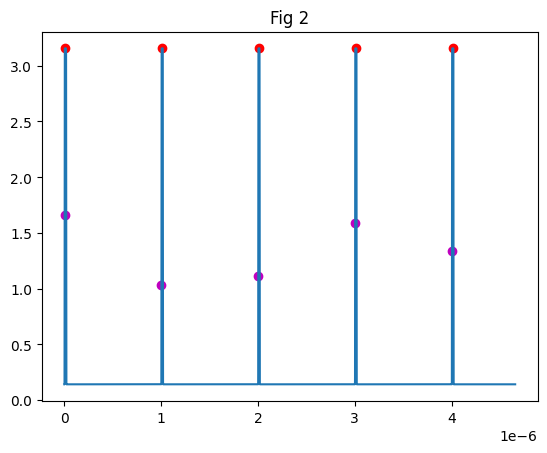

In [33]:
""" Slope checker: N Pulses """

# record 
trise = []
vrise = []
count = 0
eps = 0.5
Vmid = 1.5
pulses = 5

slope = np.diff(ch1V)/np.diff(ch1t)
lasthitT = -1

for (m,t,v) in zip(slope,ch1t,ch1V): 
    if (m > 0 ) and (Vmid - eps) <= v <= (Vmid + eps):
        if ( lasthitT != -1 ) and (np.abs(t - lasthitT) < 4e-9 ):
            continue  
        if count <= pulses: 
            lasthitT = t
            trise.append(t)
            vrise.append(v)
            count +=1
        else:
            count +=1
            print('Error, we are beyond the input pulse value.')
            print(f"Pulses: 5\nPulses found: {count}") 


print(f"# of pulses: {len(vrise)}\nList: {vrise}")
print(f"# of pulses: {len(trise)}\nList: {trise}")

plt.figure(1)
plt.title("Fig 2")
plt.plot(ch1t,ch1V)
plt.scatter(ch1t[peakindexCH1[:]],peaksCH1[:],  marker='o', color='red')
plt.scatter(trise, vrise, marker='o', color='m')

# of pulses: 2
List: [1.114004, 1.956406]
# of pulses: 2
List: [2.0033211519684e-06, 2.003675949756475e-06]


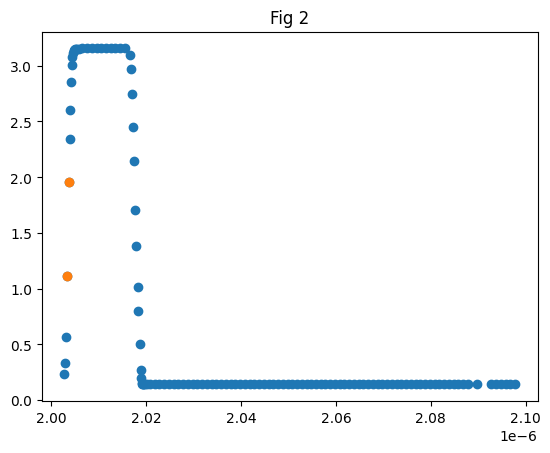

In [11]:
""" 
Rising edge issue: Missing points
- this block can also be used to examine individual peaks
"""

# View one peak
ch1peak = ch1.truncate(before=peakindexCH1[2]-20 ,after=peakindexCH1[2]+100) # smallest less 1 bc `after` adds a value
# Naming and floats
ch1tpeak = ch1peak["Time"].to_numpy()
ch1Vpeak = ch1peak["V(compout)-CH1"].to_numpy()

# record 
trise = []
vrise = []
count = 0
eps = 0.5
Vmid = 1.5
pulses = 5

slope = np.diff(ch1Vpeak)/np.diff(ch1tpeak)

for (m,t,v) in zip(slope,ch1tpeak,ch1Vpeak):
    if count <= pulses: 
        if (m > 0 ) and (Vmid - eps) <= v <= (Vmid + eps):
            trise.append(t)
            vrise.append(v)
            count +=1
    else:
        print('Error, we are beyond the input pulse value.')
        print(f"Pulses: {pulses}\nPulses found: {count}") 
        break


print(f"# of pulses: {len(vrise)}\nList: {vrise}")
print(f"# of pulses: {len(trise)}\nList: {trise}")

plt.figure(1)
plt.title("Fig 2")
plt.scatter(ch1tpeak,ch1Vpeak)
# plt.scatter(ch1tpeak[peakindexCH1[:]],peaksCH1[:],  marker='o', color='red')
plt.scatter(trise, vrise)